# 3D surface plot using Matplotlib
by: Iury T. Simoes-Sousa  ([iuryt](https://github.com/iuryt/))

The strategy is to select the data from each surface and plot contours separately.

To use this feature you need to have gridded coordinates.

The contour plot from Matplotlib has `zdir` argument that defines the normal coordinate to the plotted surface.

The `offset` argument defines the offset applied to the contourf surface. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
#Define dimensions
Nx,Ny,Nz = 100,300,500
X = xr.DataArray(np.arange(Nx),dims=['X'])
Y = xr.DataArray(np.arange(Ny),dims=['Y'])
Z = xr.DataArray(-np.arange(Nz),dims=['Z'])

#Create fake data 
#This code works for da => ZYX. 
#For da => XYZ or YXZ or ZYX you may have to change the plotting part.
# or transpose the data before plotting
da = xr.DataArray(
    ((X+100)**2 + (Y-20)**2 + 2*Z)/1000+1,
    coords={'X':X,'Y':Y,'Z':Z},
    dims=['X','Y','Z']
).T #.T invert from XYZ to ZYX

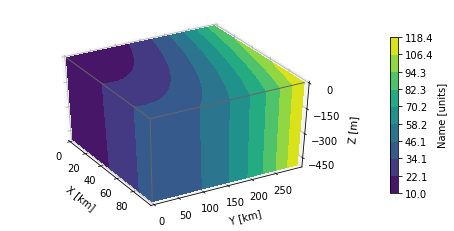

In [3]:
vmin = da.min().values
vmax = da.max().values
#Key arguments for contour plots
kw = {
    'vmin':vmin,
    'vmax':vmax,
    'levels':np.linspace(vmin,vmax,10),
    'cmap':'viridis',
}

#Create a figure with 3D ax
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111,projection='3d')

#Upper surface--
#Select the surface at Z=0
di = da.sel(Z=0,method='nearest')
#Create the grid for plotting (required for 3D plots)
dims = np.meshgrid(di[di.dims[1]].values,di[di.dims[0]].values)
#Plot surface
#zdir sets the normal axis and
#offset is the surface offset at this normal axis 
C = ax.contourf(dims[0],dims[1],di.values,zdir='z',offset=0,**kw)
# -- 


#South surface--
#Select the face at Y=0
di = da.sel(Y=0)
#Create the grid for plotting (required for 3D plots)
dims = np.meshgrid(di[di.dims[1]].values,di[di.dims[0]].values)
#Plot surface
#zdir sets the normal axis and
#offset is the surface offset at this normal axis 
C = ax.contourf(dims[0],di.values,dims[1],zdir='y',offset=di.Y.values,**kw)

#East surface--
#Select the face at X=X.max()
di = da.sel(X=da.X.max(),method='nearest')
#Create the grid for plotting (required for 3D plots)
dims = np.meshgrid(di[di.dims[1]].values,di[di.dims[0]].values)
#Plot surface
#zdir sets the normal axis and
#offset is the surface offset at this normal axis 
C = ax.contourf(di.values,dims[0],dims[1],zdir='x',offset=di.X.values,**kw)

#Set limits of the plot from coord limits
ax.set(
    xlim=[da.X.min(),da.X.max()],
    ylim=[da.Y.min(),da.Y.max()],
    zlim=[da.Z.min(),da.Z.max()],
)

color = '0.4' #color of the line of the corners
#Get xlim,ylim and zlim
xlim,ylim,zlim = list(map(np.array,[ax.get_xlim(),ax.get_ylim(),ax.get_zlim()]))
#Plot corners
ax.plot(xlim*0+xlim[1],ylim,zlim*0,color,linewidth=1,zorder=1e4)
ax.plot(xlim,ylim*0+ylim[0],zlim*0,color,linewidth=1,zorder=1e4)
ax.plot(xlim*0+xlim[1],ylim*0+ylim[0],zlim,color,linewidth=1,zorder=1e4)

#Set labels and zticks
ax.set(
    xlabel='\n X [km]',
    ylabel='\n Y [km]',
    zlabel='\n Z [m]',
    zticks=[0,-150,-300,-450],
)

#Set distance and angle view
ax.view_init(40, -30)
ax.dist = 11

#Colorbar
fig.colorbar(C,ax=ax,fraction=0.02,pad=0.1,label='Name [units]')